In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

*Prepare the dataset.*

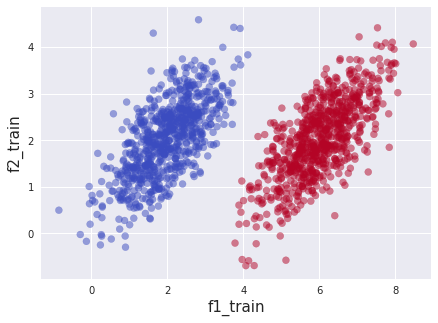

In [2]:
size = 1000
np.random.seed(4)

# Features
x_first_half = np.random.multivariate_normal([2, 2], [[0.7, 0.5],[0.5, 0.7]], size)   #1000*2
x_second_half = np.random.multivariate_normal([6, 2], [[0.7, 0.5],[0.5, 0.7]], size)   #1000*2
Features = np.vstack((x_first_half, x_second_half)).astype(np.float32)   #2000*2

# Label column (x_first_half labeled as zeros AND x_second_half labeled as ones)
Label = np.hstack((np.zeros(size), np.ones(size)))   #2000*1  (vstack-->2,1000 which will be wrong)

# Add bias value of ones to the left of Features
Features_1 = np.c_[np.ones((Features.shape[0])), Features]   # OR  df = np.column_stack()   #2000*3

# Concatenate the features and labels
df = np.c_[Features_1,Label]

# Arrange the data randomly.
random_indices = np.random.permutation(df.shape[0])
df = df[random_indices]

# Split the data into training-set(75% = 1500) and test-set(25% = 500)
train = df[:1500,:]          # 1500*3
test = df[1500:,:]           # 500*3

# training-set columns
f0_train = train[:,0]   # bias
f1_train = train[:,1]   # feature 1
f2_train = train[:,2]   # feature 2
X_train = train[:,0:3]  # feature matrix
y_train = train[:,3]    # label column

# Similarly, for test-set
f0_test = test[:,0]   # bias
f1_test = test[:,1]   # feature 1
f2_test = test[:,2]   # feature 2
X_test = test[:,0:3]  # feature matrix
y_test = test[:,3]    # label column

# Plot the data
plt.figure(figsize=(7,5))
plt.scatter(f1_train, f2_train, c=y_train, cmap='coolwarm', alpha=0.5)
plt.xlabel('f1_train', fontsize=15)
plt.ylabel('f2_train', fontsize=15)
plt.show()

*Plot "f1_train" vs "y_train" scatter plot. We see that the obvious result is either "1" or "0".*

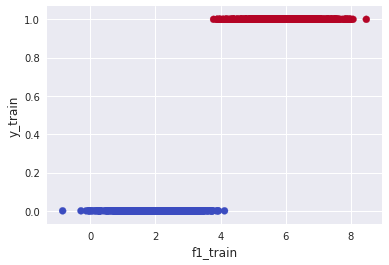

In [3]:
plt.scatter(f1_train, y_train, marker='o', c=y_train, cmap='coolwarm')
plt.xlabel('f1_train', fontsize=12)
plt.ylabel('y_train', fontsize=12)
plt.show()

*Suppose we had only one feature and labels for it.
Let us first fit a linear regression line to it taking first feature(f1_train) into account.
We clearly see that orange regression line won't predict correctly.*

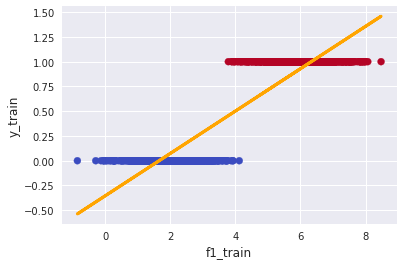

In [4]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
lr=linear_model.LinearRegression()
X1 = np.c_[f0_train,f1_train]

lr.fit(X1, y_train)
y_pred1 = lr.predict(X1)                  # predicted y values = h(hypothesis)

plt.scatter(f1_train, y_train, marker='o', c=y_train, cmap='coolwarm')
plt.plot(f1_train, y_pred1, color='orange',linewidth=3)
plt.xlabel('f1_train', fontsize=12)
plt.ylabel('y_train', fontsize=12)
plt.show()

_Let's carry out Logistic Regression._<br><br>

$Cost = J(\theta),\quad
Gradient = \dfrac{\partial J(\theta)}{\partial \theta_j},\quad
sigmoid\,(z) = \dfrac{1}{1 + e^{(-z)}}$

\begin{equation*}
J(\theta)   = \frac{1}{m} \sum_{i=1}^{m} \Big[ -y^{(i)} log\big(h_\theta (x^{(i)})\big) -
\big(1-y^{(i)}\big)log\big(1-h_\theta (x^{(i)})\big) \Big]
\end{equation*}

\begin{equation*}
\frac{\partial J(\theta)}{\partial \theta_j}   = \Big(\frac{1}{m} \sum_{i=1}^{m} \big(h_\theta (x^{(i)})-y^{(i)}\big)x_j^{(i)}\Big)
\end{equation*}

\begin{equation*}
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
\end{equation*}

In [5]:
def sigmoid(z):
    sig = 1 / ( 1 + np.exp(-z) )
    return sig

def costF(X, theta, y):        # Cost Function
    m = X.shape[0]
    z = X.dot(theta)
    h = sigmoid(z)
    J = (-1/m) * np.sum( y.dot( np.log(h) ) + (1-y).dot( np.log(1-h) ) )
    return J

def grad(X, theta, y, l_rate, iters):     # Gradient Descent
    J_record = []                         # List of costs calculated on every iteration
    for i in range(iters):
        m = X.shape[0]
        z = X.dot(theta)
        h = sigmoid(z)
        e = h-y
        grad = (1/m) * X.T.dot(e)         # Gradient
        theta -= l_rate*grad              # Theta update
        cost = costF(X, theta, y)
        J_record.append(cost)
    return theta, J_record, h

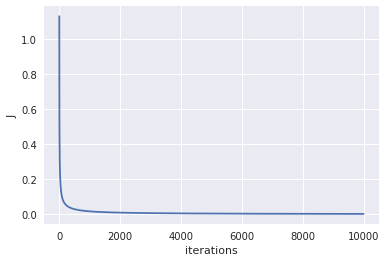

In [6]:
np.random.seed(0)
theta = np.random.random(X_train.shape[1])  # Generate/Initialise theta
l_rate = 0.25                               # Learning rate
iters = 10000                               # No. of Iterations

# Grab the optimum value of theta and list of costs in optTheta and J_record respectively
optTheta, J_record, h  = grad(X_train, theta, y_train, l_rate, iters)

# Iterations-Vs-Cost graph
plt.plot( range(iters), J_record )
plt.xlabel("iterations")
plt.ylabel("J")
plt.show()

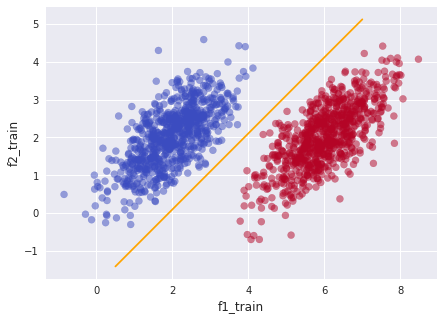

In [7]:
# Visualize the decision boundary with the training-set
xx_train = np.linspace(0.5, 7, X_train.shape[0])
yy_train = (  - optTheta[0] - xx_train.dot(optTheta[1]) ) / optTheta[2]

plt.figure(figsize=(7,5))
plt.scatter(f1_train, f2_train, c=y_train, cmap='coolwarm', alpha=0.5)
plt.plot(xx_train, yy_train, color='orange')
plt.xlabel('f1_train', fontsize=12)
plt.ylabel('f2_train', fontsize=12)
plt.show()

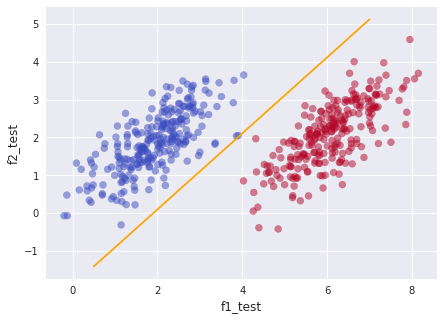

In [8]:
# Visualize the decision boundary with the test-set
xx_test = np.linspace(0.5, 7, X_test.shape[0])
yy_test = (  - optTheta[0] - xx_test.dot(optTheta[1]) ) / optTheta[2]

plt.figure(figsize=(7,5))
plt.scatter(f1_test, f2_test, c=y_test, cmap='coolwarm', alpha=0.5)
plt.plot(xx_test, yy_test, color='orange')
plt.xlabel('f1_test', fontsize=12)
plt.ylabel('f2_test', fontsize=12)
plt.show()

In [9]:
# Update the prediction(h) value to 0 if they are less than 0.5 and to 1 if they are more than 0.5
# and store them in a variable "h_binary"
h_binary = list(range(len(h)))
# print(h_binary)
for i in range(0,len(h)):
    if h[i]<0.5:
        h_binary[i] = 0
    else:
        h_binary[i] = 1

In [10]:
# Acuracy
error=sum((h_binary-y_train)**2)   #  for training-set
accuracy=1-(error/100)
accuracy

1.0

## Logistic Regression using scikit-learn

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
# clf.fit(X_train, y_train)         # for training-set
# y_pred = clf.predict(X_train)     # for training-set
clf.fit(X_test, y_test)              # for test-set
y_pred = clf.predict(X_test)         # for test-set

# print(clf.intercept_, clf.coef_)

In [12]:
# Acuracy
error=sum((y_pred-y_test)**2)
accuracy=1-(error/100)
accuracy

1.0